In [43]:
import osmnx as ox
import networkx as nx
import os
%matplotlib inline

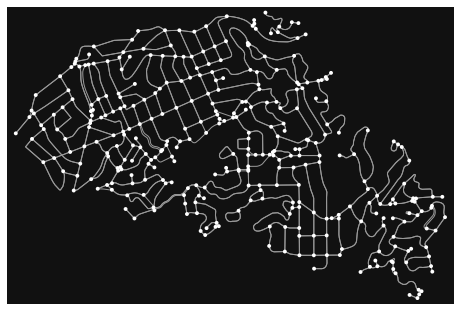

In [2]:
G = ox.graph_from_place('Piedmont, California, USA', network_type='drive')
fig, ax = ox.plot_graph(ox.project_graph(G))

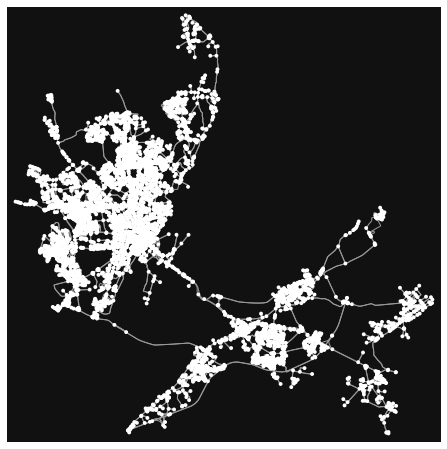

In [4]:
szczecin = ox.graph_from_place('Szczecin', network_type = 'drive')
fig,ax = ox.plot_graph(szczecin)

In [16]:
def save_graph(G, place_name):
    filepath = '../../data/' + place_name + '.graphml'

    if not os.path.exists(filepath):
        ox.save_graphml(G, filepath)

In [17]:
#saving data about my home city

In [19]:
save_graph(szczecin, 'szczecin')

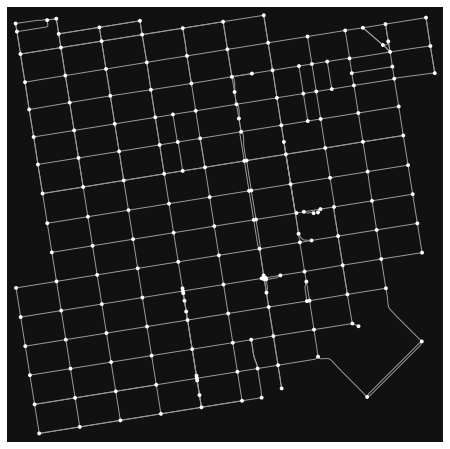

In [30]:
#mostly taken from https://geoffboeing.com/2017/01/square-mile-street-network-visualization/
def save_small_networks():
    G = ox.graph_from_address('350 5th Ave, New York, New York', network_type='drive')
    save_graph(G, 'small_ny')
    
    G = ox.graph_from_point((37.79, -122.41), dist=750, network_type='drive')
    ox.plot_graph(G)
    save_graph(G, 'somewhere')
    
save_small_networks()

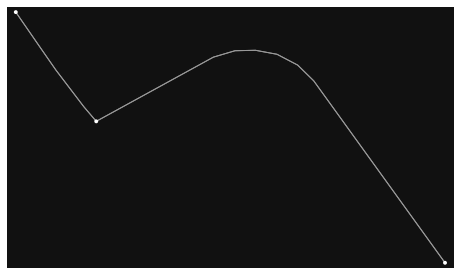

In [35]:
G = ox.graph_from_point((37.60, -122.40), dist=200, network_type='drive')
ox.plot_graph(G)
save_graph(G, 'small_somewhere')

In [85]:
def get_id(value, index, first_unused):
    if value not in index:
        index[value] = first_unused
        first_unused += 1
        
    return index[value], index, first_unused
    
def get_simple_description(graph):
    edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)
    lengths = edges['length'].values

    first_unused = 0
    index = {}

    edgelist = []
    it = 0
    for edge in graph.edges():
        a, index, first_unused = get_id(edge[0], index, first_unused)
        b, index, first_unused = get_id(edge[1], index, first_unused)

        edgelist.append((a, b, lengths[it]))
        it += 1

    return edgelist, first_unused

edges, n = get_simple_description(G)

In [90]:
def save_as_simple_edgelist(graph, place_name):
    filepath = '../../data/' + place_name + '.txt'
    edgelist, n = get_simple_description(graph)
    
    with open(filepath, 'w') as file:
        file.write(str(n) + ' ' + str(len(edgelist)) + '\n')
        for e in edgelist:
            file.write(str(e[0]) + ' ' + str(e[1]) + ' ' + str(e[2]) + '\n')
            
            
save_as_simple_edgelist(G, 'small_somewhere')

In [91]:
save_as_simple_edgelist(szczecin, 'szczecin')